In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import os
from selenium.webdriver import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait

In [2]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Warning: Failed to create the directory.")

In [3]:
# 검색어 지정
search_text = '삼성전자'

"MjjYud" - class name

In [4]:
driver = webdriver.Chrome()
driver.get('https://www.google.com/search?q='+ search_text)

print(driver.title)

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser') 

link_list = []
for i in range(2, 10):
    a = driver.find_element(By.XPATH, '//*[@id="rso"]/div['+str(i)+']')
    link_list.append(a.find_element(By.TAG_NAME, 'a').get_attribute('href'))

print(link_list)
createDirectory('./finded_'+ search_text)

# 검색 결과 페이지에서 하나씩 열어서 내용 전부 크롤링

p_num = 0
for link in link_list:
    driver.get(link)
    html = driver.page_source 
    soup = BeautifulSoup(html, 'html.parser') 
    f = open('./finded_'+ search_text +'/' + str(p_num) + '.txt', 'w', encoding='utf-8')
    f.write(soup.text)
    p_num += 1
    f.close()

driver.close()

삼성전자 - Google 검색
['https://www.samsung.com/sec/aboutsamsung/', 'https://twitter.com/search?q=%EC%82%BC%EC%84%B1+%EC%A0%84%EC%9E%90&ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Esearch', 'https://www.samsungcareers.com/', 'https://www.samsungsvc.co.kr/', 'https://www.samsungstore.com/', 'https://namu.wiki/w/%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90', 'http://www.sec.co.kr/', 'https://www.google.com/search?sca_esv=564443435&q=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90&npsic=0&rflfq=1&rldoc=1&rllag=37315642,126842507,1134&tbm=lcl&sa=X&ved=2ahUKEwjv3c-CoaOBAxUKdt4KHWzYB4YQtgN6BAhlEAI']


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.179)
Stacktrace:
0   chromedriver                        0x000000010a201638 chromedriver + 5002808
1   chromedriver                        0x000000010a1f8a53 chromedriver + 4966995
2   chromedriver                        0x0000000109da9a57 chromedriver + 449111
3   chromedriver                        0x0000000109d7c8a1 chromedriver + 264353
4   chromedriver                        0x0000000109e1b76f chromedriver + 915311
5   chromedriver                        0x0000000109e30976 chromedriver + 1001846
6   chromedriver                        0x0000000109e161c3 chromedriver + 893379
7   chromedriver                        0x0000000109de1df9 chromedriver + 679417
8   chromedriver                        0x0000000109de2fde chromedriver + 683998
9   chromedriver                        0x000000010a1be2d9 chromedriver + 4727513
10  chromedriver                        0x000000010a1c32de chromedriver + 4747998
11  chromedriver                        0x000000010a1812c9 chromedriver + 4477641
12  chromedriver                        0x000000010a1c402d chromedriver + 4751405
13  chromedriver                        0x000000010a1970ec chromedriver + 4567276
14  chromedriver                        0x000000010a1e17f8 chromedriver + 4872184
15  chromedriver                        0x000000010a1e19b7 chromedriver + 4872631
16  chromedriver                        0x000000010a1f1a1f chromedriver + 4938271
17  libsystem_pthread.dylib             0x00007ff81a2601d3 _pthread_start + 125
18  libsystem_pthread.dylib             0x00007ff81a25bbd3 thread_start + 15


In [5]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [6]:
file_list = os.listdir('./finded_'+ search_text)

file_list.sort()
file_list

['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt']

In [7]:
with open('finded_'+ search_text +'.txt', 'w') as outfile:
    for filename in file_list:
        with open('./finded_' + search_text + '/' + filename) as file:
            outfile.write(file.read())

In [8]:
text = open('finded_'+ search_text +'.txt').read() 

twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(text) 

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(40) 

wc = WordCloud(font_path="/Users/kimhyunwoo/Library/Fonts/NanumBarunGothic.ttf",background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))


cloud.to_file('finded_'+ search_text +'.jpg')

/Users/kimhyunwoo/.pyenv/versions/3.8.6/lib/python3.8/site-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


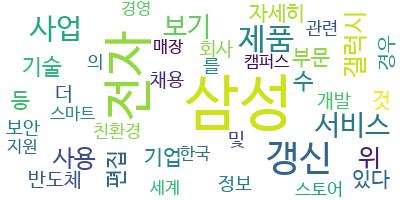

In [9]:
from IPython.display import Image

Image(filename='finded_'+ search_text +'.jpg')